### Stock analysys

#### Questions: 
**1.** What was the change in price of the stock over time?  
**2.** What was the daily return of the stock on average?  
**3.** What was the moving average of the various stocks?  
**4.1.** What was the correlation between different stocks' closing prices?  
**4.2.** What was the correlation between different stocks's daily returns?  
**5.** How much value do we put at risk by investing in a particular stocks?  
**6.** How much we attempt to predict future stock behavior?

In [1]:
import pandas as pd
import numpy as p
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import data

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [6]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [7]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock, 'yahoo', start,end)

In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,248.735315,243.128347,245.580118,246.152756,3.351312e+07,245.215164
std,43.563968,42.347848,42.789021,43.176151,1.719532e+07,43.700473
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,207.200001,203.632500,205.807495,205.670002,2.186125e+07,204.471893
50%,248.945000,239.809998,244.634995,244.180000,2.845690e+07,243.527946
75%,283.940002,277.967491,279.949997,280.312500,3.803428e+07,279.648819
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-05-07 to 2020-05-07
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


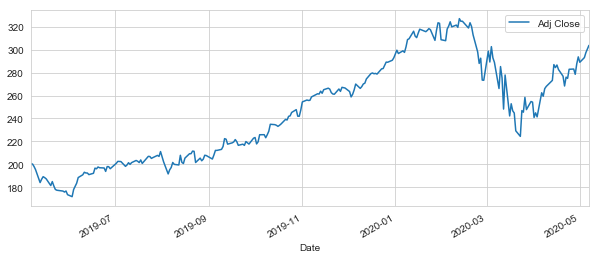

In [10]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

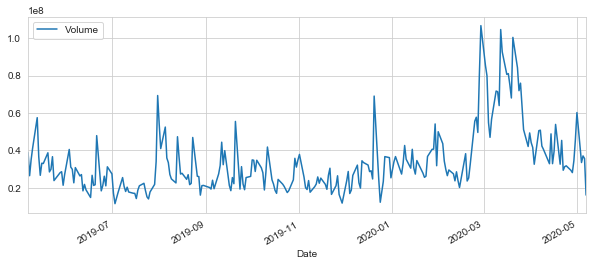

In [11]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [12]:
ma_day =[10, 20, 50]

for ma in ma_day:
    column_name = "MA for {} days".format(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

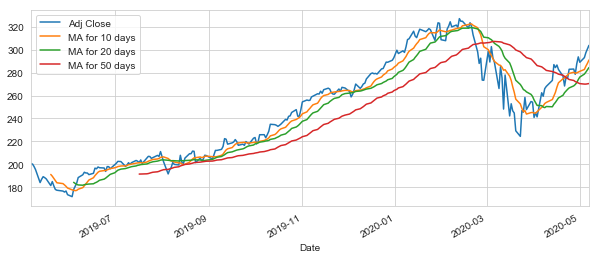

In [13]:
AAPL[['Adj Close','MA for 10 days', 
      'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10, 4))

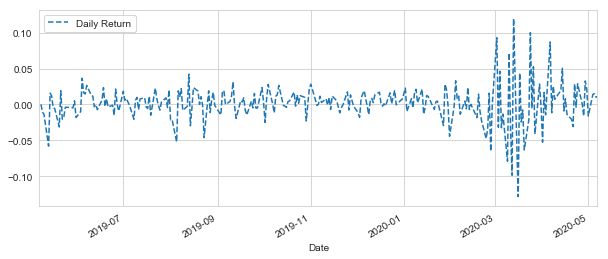

In [14]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--')

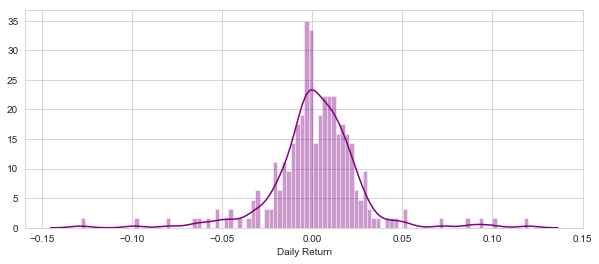

In [15]:
fig, ax = plt.subplots(figsize=(10,4))
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple', ax=ax)

In [16]:
closing_df = data.DataReader(tech_list, 'yahoo', start,end)['Adj Close']

In [17]:
closing_df.head(3)

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-07,200.239075,1921.000000,1174.099976,123.880966
2019-05-08,200.278534,1917.770020,1166.270020,123.871117
2019-05-09,198.126709,1899.869995,1162.380005,123.861244


In [18]:
tech_rets = closing_df.pct_change()

In [19]:
tech_rets.head(3)

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-07,NaN,NaN,NaN,NaN
2019-05-08,0.000197,-0.001681,-0.006669,-0.00008
2019-05-09,-0.010744,-0.009334,-0.003335,-0.00008


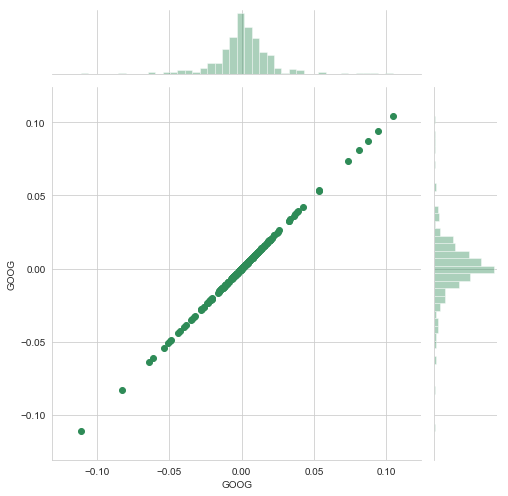

In [20]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', 
              color='seagreen', height=7)

C:\Users\Алексей\Anaconda\lib\site-packages\seaborn\axisgrid.py:1849: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


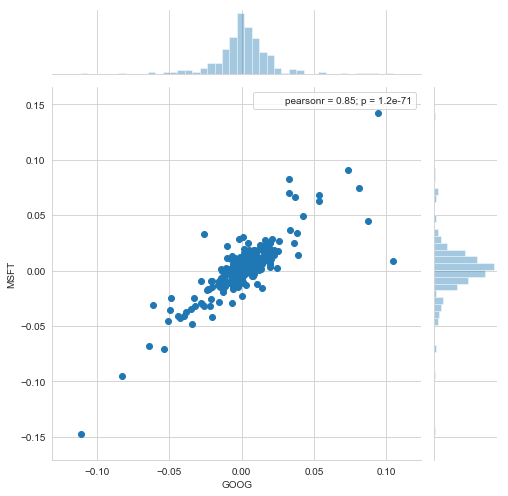

In [21]:
from scipy import stats
sns.jointplot("GOOG", "MSFT", tech_rets, 
              kind='scatter', height=7).annotate(stats.pearsonr)

In [22]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-07,NaN,NaN,NaN,NaN
2019-05-08,0.000197,-0.001681,-0.006669,-0.000080
2019-05-09,-0.010744,-0.009334,-0.003335,-0.000080
2019-05-10,-0.013853,-0.005206,0.001626,0.012988
2019-05-13,-0.058119,-0.035609,-0.027691,-0.029733


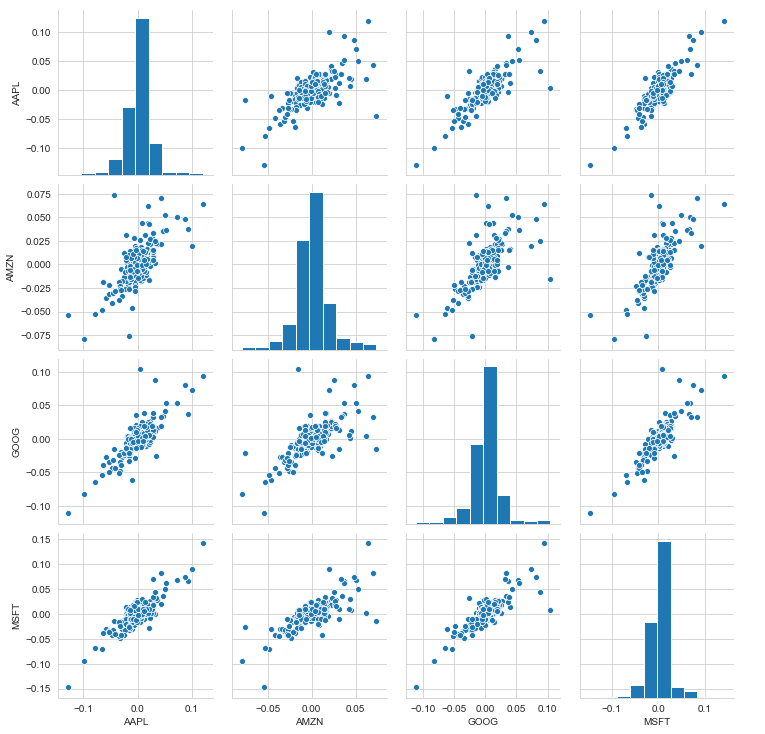

In [23]:
sns.pairplot(tech_rets.dropna())

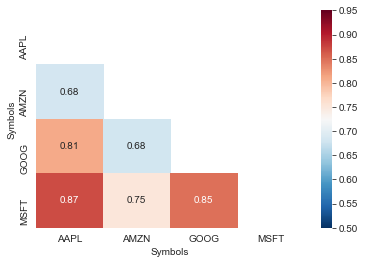

In [24]:
import numpy as np

corr_df = tech_rets.dropna().corr()

mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)

sns.heatmap(corr_df, mask=mask_ut, annot=True, 
            cmap="RdBu_r", vmin=0.5, vmax=0.95)

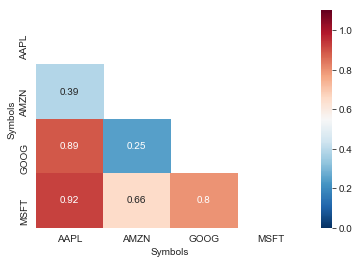

In [25]:
corr_df = closing_df.dropna().corr()

mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)

sns.heatmap(corr_df, mask=mask_ut, annot=True, 
            cmap="RdBu_r", vmin=0, vmax=1.1)

In [26]:
rets = tech_rets.dropna()

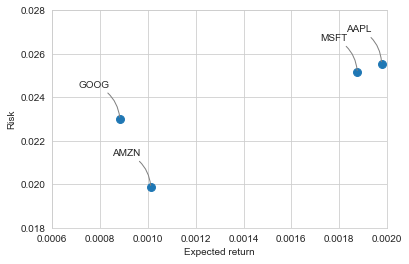

In [31]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.ylim([0.018, 0.028])
plt.xlim([0.0006, 0.002])

plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', 
                          color="0.5", connectionstyle = 'Arc3,rad=-0.3')
        )

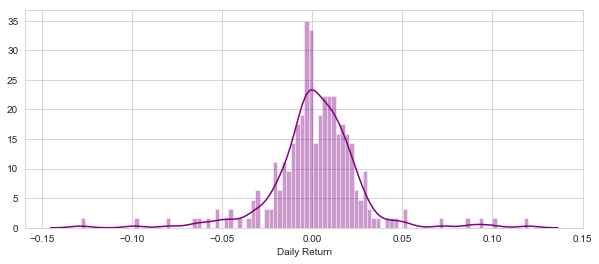

In [35]:
fig, ax = plt.subplots(figsize=(10,4))
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple', ax=ax)

In [36]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-05-08,0.000197,-0.001681,-0.006669,-0.000080
2019-05-09,-0.010744,-0.009334,-0.003335,-0.000080
2019-05-10,-0.013853,-0.005206,0.001626,0.012988
2019-05-13,-0.058119,-0.035609,-0.027691,-0.029733
2019-05-14,0.015830,0.009568,-0.010238,0.011188


In [43]:
rets['AAPL'].quantile(0.05)

-0.034215511527353734

In [44]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [59]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [60]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-07,1190.439941,1161.040039,1180.469971,1174.099976,1551400,1174.099976
2019-05-08,1180.423950,1165.739990,1172.010010,1166.270020,1309300,1166.270020
2019-05-09,1169.660034,1150.849976,1159.030029,1162.380005,1185700,1162.380005
2019-05-10,1172.599976,1142.500000,1163.589966,1164.270020,1314500,1164.270020
2019-05-13,1147.939941,1122.109985,1141.959961,1132.030029,1860600,1132.030029


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

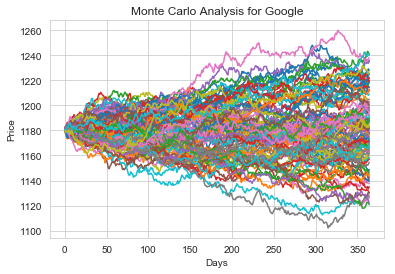

In [61]:
start_price = 1180.47

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis for Google")

In [69]:
runs = 100000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]


Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

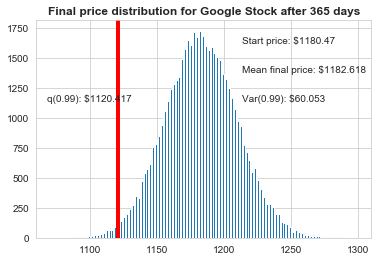

In [70]:
q = np.percentile(simulations, 1)

plt.hist(x=simulations, bins=200)

plt.figtext(0.6, 0.8, s="Start price: ${}".format(start_price))

plt.figtext(0.6, 0.7, "Mean final price: ${}".format(round(simulations.mean(), 3)))

plt.figtext(0.6, 0.6, "Var(0.99): ${}".format(round(start_price - q, 3)))

plt.figtext(0.15, 0.6, "q(0.99): ${}".format(round(q, 3)))

plt.axvline(x=q, linewidth=4, color='r')

plt.title("Final price distribution for Google Stock after {} days".format(
        days), weight='bold')